# Logistic Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset=pd.read_csv('HRV.csv')

In [3]:
dataset.head()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4234 non-null   int64  
 1   age            4234 non-null   int64  
 2   currentSmoker  4234 non-null   int64  
 3   totChol        4184 non-null   float64
 4   sysBP          4234 non-null   float64
 5   diaBP          4234 non-null   float64
 6   BMI            4215 non-null   float64
 7   heartRate      4233 non-null   float64
 8   glucose        3847 non-null   float64
 9   TenYearCHD     4234 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 330.9 KB


## Dataset Preprocessing

In [5]:
#Check for missing data
dataset.isnull().sum()

male               0
age                0
currentSmoker      0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

<AxesSubplot:xlabel='totChol', ylabel='Count'>

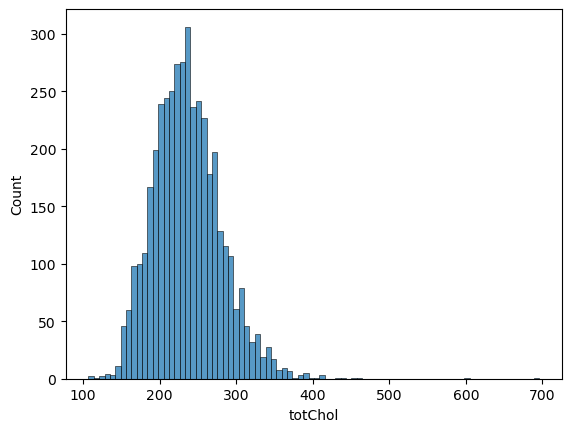

In [6]:
# Several things are missing from our data, first is 'totChol'
# Slight skew, so we will use median
sns.histplot(dataset['totChol'])

<AxesSubplot:xlabel='BMI', ylabel='Count'>

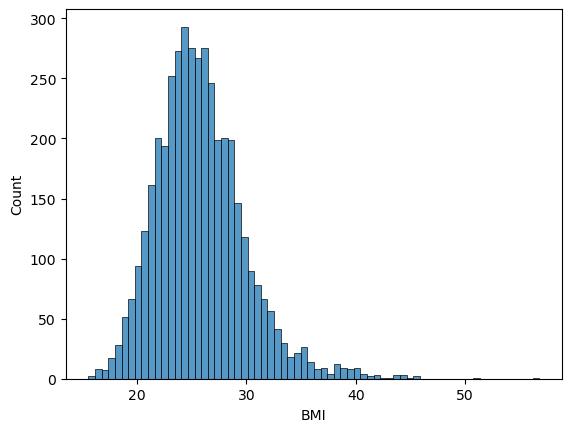

In [7]:
# Second is 'BMI' 
# Slight skew, so we will use median
sns.histplot(dataset['BMI'])

<AxesSubplot:xlabel='heartRate', ylabel='Count'>

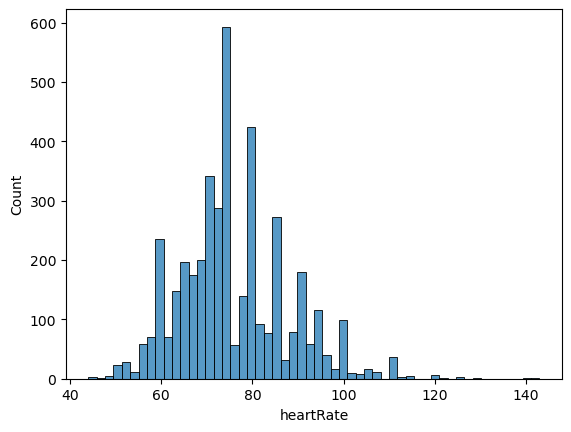

In [8]:
# Third is 'heartRate'
# Skewed, we will use median
sns.histplot(dataset['heartRate'])

<AxesSubplot:xlabel='glucose', ylabel='Count'>

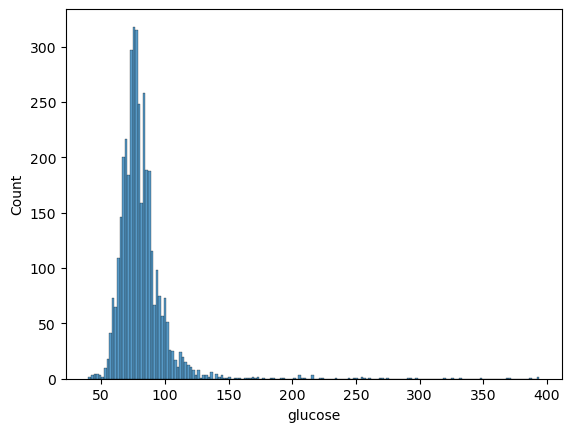

In [9]:
# Last is 'glucose'
# Skewed as well, so we will also use median
sns.histplot(dataset['glucose'])

In [10]:
# Impute the missing values into our data
# 4 total values to impute
# Simply input the values you must impute, eg: totChol needs to be imputed

totChol_median=dataset['totChol'].median()
dataset['totChol'].fillna(totChol_median, inplace=True)

BMI_median=dataset['BMI'].median()
dataset['BMI'].fillna(BMI_median, inplace=True)

heartRate_median=dataset['heartRate'].median()
dataset['heartRate'].fillna(heartRate_median, inplace=True)

glucose_median=dataset['glucose'].median()
dataset['glucose'].fillna(glucose_median, inplace=True)

In [11]:
# Re-checking the dataset to ensure everything was imputed as needed
# Everything imputed correctly

dataset.isnull().sum()

male             0
age              0
currentSmoker    0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
TenYearCHD       0
dtype: int64

### Create independent and dependent variables to predict 

In [18]:
# Independent Variables
# x=drop tenyearchd
X=dataset.drop('TenYearCHD',axis=1)
y=dataset[['TenYearCHD']]


## Splitting the dataset into the Training set and Test set

In [19]:
# Model import for splitting
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=.2,
                                              random_state=42)

## Training the Logistic Regression model 

In [21]:
# Model import for training

from sklearn.linear_model import LogisticRegression

In [22]:
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train.values,y_train.values.ravel())

LogisticRegression(max_iter=1000)

## Predicting a new result
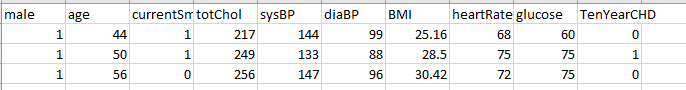

In [31]:
print(classifier.predict([[1,44,1,217,144,99,25.16,68,60]]))

[0]


In [32]:
print(classifier.predict([[1,50,1,249,133,88,28.5,75,75]]))

[0]


In [33]:
print(classifier.predict([[1,56,0,256,147,96,30.42,72,75]]))

[0]


### Confusion matrix, Confusion matrix display and classification report

In [27]:
y_pred=classifier.predict(X_test.values)

In [28]:
#Comparing y_test and y_pred
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[730   5]
 [108   4]]


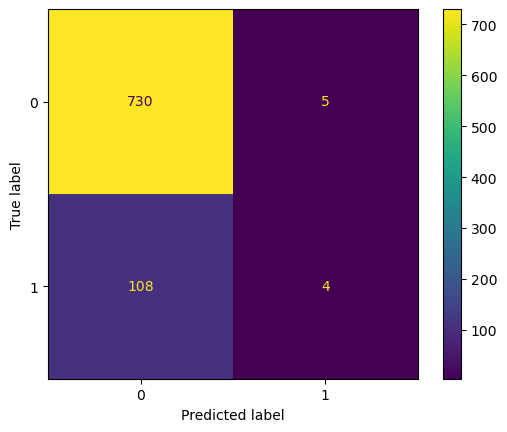

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=classifier.classes_)

disp.plot()
plt.show()

### Discuss the results

In [ ]:
The model correctly predicted TenYearCHD

### Summary

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       735
           1       0.44      0.04      0.07       112

    accuracy                           0.87       847
   macro avg       0.66      0.51      0.50       847
weighted avg       0.81      0.87      0.81       847

